Guedider Mehdi




Peut-on prédire le coût d’une assurance santé à partir des caractéristiques personnelles d’un assuré ?


Notre but est de créer un modèle de Regression multiple pour Prédire le cout d'une assurance

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [12]:
df = pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
#Verification des doublons

df.duplicated().sum()


1

In [17]:
df[df.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [21]:
df = df.drop_duplicates()


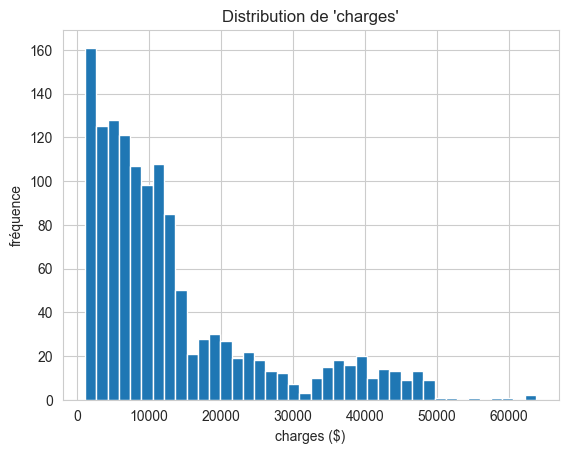

In [22]:
# 1) Distribution de la cible
plt.figure()
plt.hist(df["charges"], bins=40)
plt.title("Distribution de 'charges'")
plt.xlabel("charges ($)")
plt.ylabel("fréquence")
plt.show()

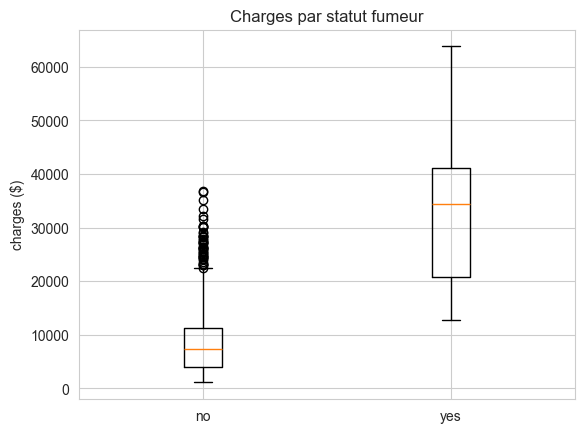

In [23]:
# 2) Impact du tabac
groups = [df[df["smoker"]=="no"]["charges"], df[df["smoker"]=="yes"]["charges"]]
plt.figure()
plt.boxplot(groups, labels=["no","yes"])
plt.title("Charges par statut fumeur")
plt.ylabel("charges ($)")
plt.show()

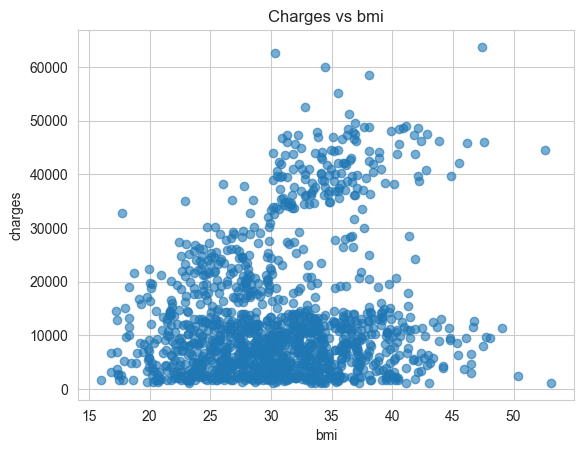

In [24]:
plt.figure()
plt.scatter(df["bmi"], df["charges"], alpha=0.6)
plt.title("Charges vs bmi")
plt.xlabel("bmi"); plt.ylabel("charges")
plt.show()

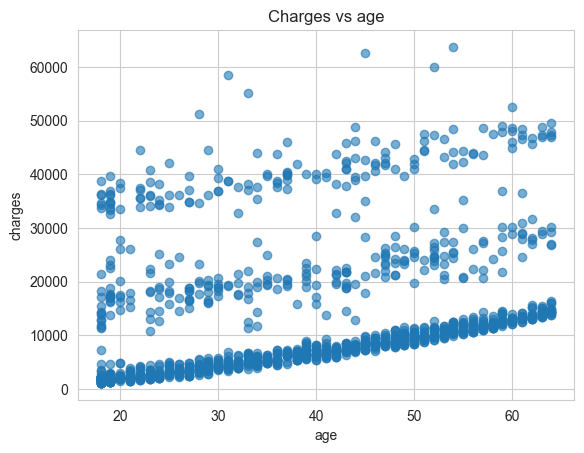

In [25]:
# 3) Relations age
plt.figure()
plt.scatter(df["age"], df["charges"], alpha=0.6)
plt.title("Charges vs age")
plt.xlabel("age"); plt.ylabel("charges")
plt.show()

Encodage des Variables catégorielles

Notre but est de faire une régression multiple
et les Modèles de ML ne prennent pas en entrée des variables catégorielles

donc il faut les encoder pour qu'elle deviennent des valeurs numériques



In [26]:
print("🚀 Colonnes AVANT encodage :\n")
print(df.columns.tolist())




🚀 Colonnes AVANT encodage :

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [27]:

# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)

print("\n\n✅ Colonnes APRÈS encodage :\n")
print(df_encoded.columns.tolist())




✅ Colonnes APRÈS encodage :

['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [28]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [29]:
df_encoded.to_csv("insurance_encoded.csv", index=False)


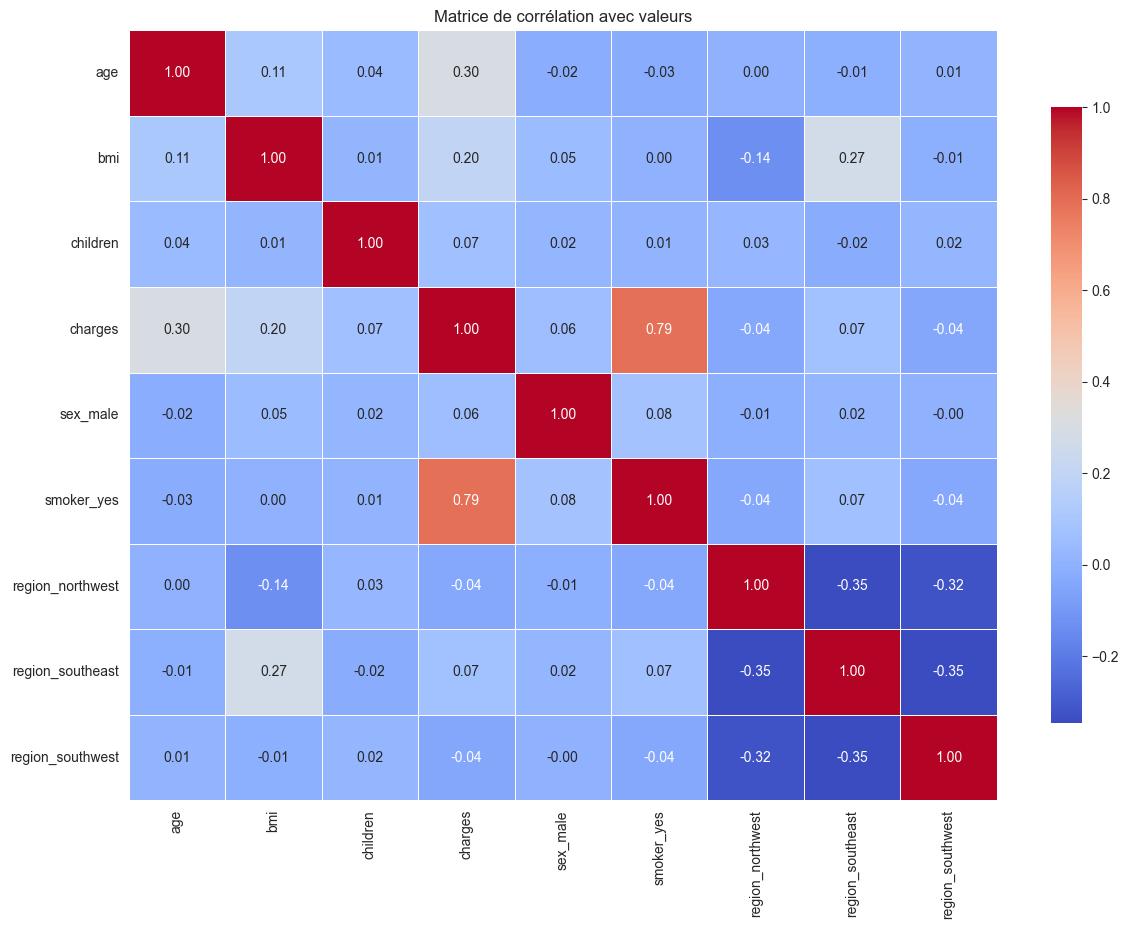

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(
    df_encoded.corr(),
    cmap="coolwarm",
    annot=True,         # ← affiche les valeurs
    fmt=".2f",          # ← format des nombres
    linewidths=0.5,     # ← lignes entre les cases
    cbar_kws={"shrink": 0.8}  # ← barre de couleur plus petite
)
plt.title("Matrice de corrélation avec valeurs")
plt.show()


L'encodage nous a permis de transformer la variable categorielle "sex" de type chaine de caractere en "sex_male" qui est de type bouleen

de meme pour la variable "smoker"

Pour la variable région
les 4 valeurs "region_northwest,region_southeast,region_southwest" seront représenté par 4 colonnes booleenes

In [31]:
# Notre variable Cible "charges"

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]


TRAIN/TEST


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


On choisit le modèle de REG Multiple de scikit-learn

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Entrainement du modèle

In [34]:
y_pred = model.predict(X_test)


Evaluation

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² :", r2)
print("RMSE :", rmse)


R² : 0.8069287081198013
RMSE : 5956.342894363585


Interpretation des Résultats :

R² = 0.8069

RMSE ≈ 5956 $

Ces résultats montrent que le modèle explique environ 80 % de la variance des coûts d’assurance, ce qui est très satisfaisant compte tenu de la variabilité naturelle des données médicales.

Le RMSE d'environ 6000 $ est une erreur raisonnable, sachant que les coûts peuvent varier de 1000 $ à plus de 50 000 $ selon les individus.

In [36]:
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Variable,Coefficient
4,smoker_yes,23077.764593
2,children,533.009989
1,bmi,318.701441
0,age,248.210720
3,sex_male,-101.542054
5,region_northwest,-391.761455
7,region_southwest,-659.139752
6,region_southeast,-838.919616


1. Importance des variables

L’analyse des coefficients montre que la variable ayant le plus grand impact est :

1) smoker_yes (fumeur)

C’est de loin la variable la plus influente.
Être fumeur augmente fortement le coût de l’assurance — ce qui est cohérent avec les risques médicaux élevés.

2. BMI (obésité)

Un BMI élevé augmente aussi significativement les charges, surtout chez les fumeurs.
Il existe une interaction implicite : BMI élevé + tabagisme = coûts très élevés.

3. Age

Le coût augmente progressivement avec l’âge.
Les personnes plus âgées présentent généralement plus de risques médicaux.

4. Sexe

sex_male a un coefficient légèrement négatif →
Les hommes coûtent légèrement moins cher à assurer que les femmes dans ce dataset.
Effet faible comparé au tabagisme ou au BMI.

5. Région

Les régions (northwest, southwest, southeast) ont un effet faible.
La région de référence est northeast (supprimée par drop_first=True).
Les différences régionales ne sont pas un facteur majeur.

Interprétation globale

Le modèle montre que :
 
 
Le tabagisme est la variable dominante dans la prédiction du coût.
L’âge et le BMI influencent fortement les dépenses médicales.

Le sexe et la région ont un rôle mineur.

Le modèle représente donc correctement les relations logiques et médicales observées dans la vraie vie.

In [39]:
df_encoded2 = df_encoded
df_encoded2.to_excel("insurance_encoded2.xlsx", index=False)

df.to_excel("insurance.xlsx", index=False)